# Part 3- OLS Linear Regression 

### ADD YOUR ACADEMIC INTERGITY STATEMENT HERE AS A COMMENT BLOCK BELOW. CHECK IMPORTANT NOTE FOR MORE DETAILS.

'''I certify that the code and data in this assignment were generated independently, using only tools and resources 
    defined in the course and that I did not receieve any external help, coaching or contributions during the production of this work '''

# END OF YOUR ACADEMIC INTERGITY STATEMENT

In [58]:
#1 importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#reading, preprocessing and printing main statistic of the data set
df = pd.read_csv('insurance.csv')

In [36]:
data = pd.DataFrame(df)

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
print(data.shape)

(1338, 7)


In [40]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [41]:
data.notna().sum(axis=0)

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [42]:
data_dropped=data.dropna()
data_dropped.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [43]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [44]:
X = data.iloc[:,[0,1,2,3,4,5]]
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [45]:
y = data.iloc[:,[-1]]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [46]:
data['sex'].replace(('male', 'female'), (1, 0), inplace = True)
data['smoker'].replace(('yes', 'no'), (1, 0), inplace = True)
data['region'].replace(('northwest', 'southwest','northeast','southeast'), (0,1,2,3), inplace = True)

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520


In [48]:
# Discrete
cate = data[['region']]
cate = pd.get_dummies(cate,columns=['region'])

# Continuous
continuous = data[['age','bmi','sex','smoker','charges']]
continuous = (continuous - continuous.mean())/continuous.std()
continuous = pd.DataFrame(continuous)

# Predictor
#target = data[['charges']]
data = pd.concat([continuous,cate],axis = 1)

In [49]:
data

,age,bmi,sex,smoker,charges,region_0,region_1,region_2,region_3
0,-1.438227,-0.453151,-1.010141,1.969850,0.298472,0,1,0,0
1,-1.509401,0.509431,0.989221,-0.507273,-0.953333,0,0,0,1
2,-0.797655,0.383164,0.989221,-0.507273,-0.728402,0,0,0,1
3,-0.441782,-1.305043,0.989221,-0.507273,0.719574,1,0,0,0
4,-0.512957,-0.292447,0.989221,-0.507273,-0.776512,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,0.989221,-0.507273,-0.220468,1,0,0,0
1334,-1.509401,0.206062,-1.010141,-0.507273,-0.913661,0,0,1,0
1335,-1.509401,1.014499,-1.010141,-0.507273,-0.961237,0,0,0,1
1336,-1.295877,-0.797515,-1.010141,-0.507273,-0.930014,0,1,0,0


In [50]:
#data = data.drop(columns = [])
n_rows = data.shape[0]
split_index = int(n_rows * 0.8)

train = data.iloc[0:split_index]
test = data.iloc[split_index+1:n_rows-1]

    
X_train = train[train.columns.drop('charges')].to_numpy()
y_train = train['charges'].to_numpy()

X_test = test[test.columns.drop('charges')].to_numpy()
y_test = test['charges'].to_numpy()

In [51]:
data

,age,bmi,sex,smoker,charges,region_0,region_1,region_2,region_3
0,-1.438227,-0.453151,-1.010141,1.969850,0.298472,0,1,0,0
1,-1.509401,0.509431,0.989221,-0.507273,-0.953333,0,0,0,1
2,-0.797655,0.383164,0.989221,-0.507273,-0.728402,0,0,0,1
3,-0.441782,-1.305043,0.989221,-0.507273,0.719574,1,0,0,0
4,-0.512957,-0.292447,0.989221,-0.507273,-0.776512,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,0.989221,-0.507273,-0.220468,1,0,0,0
1334,-1.509401,0.206062,-1.010141,-0.507273,-0.913661,0,0,1,0
1335,-1.509401,1.014499,-1.010141,-0.507273,-0.961237,0,0,0,1
1336,-1.295877,-0.797515,-1.010141,-0.507273,-0.930014,0,1,0,0


Correlation Matrix:
                age       bmi       sex    smoker   charges  region_0  \
age       1.000000  0.109272 -0.020856 -0.025019  0.299008 -0.000407   
bmi       0.109272  1.000000  0.046371  0.003750  0.198341 -0.135996   
sex      -0.020856  0.046371  1.000000  0.076185  0.057292 -0.011156   
smoker   -0.025019  0.003750  0.076185  1.000000  0.787251 -0.036945   
charges   0.299008  0.198341  0.057292  0.787251  1.000000 -0.039905   
region_0 -0.000407 -0.135996 -0.011156 -0.036945 -0.039905  1.000000   
region_1  0.010016 -0.006205 -0.004184 -0.036945 -0.043210 -0.320829   
region_2  0.002475 -0.138156 -0.002425  0.002811  0.006349 -0.320177   
region_3 -0.011642  0.270025  0.017117  0.068498  0.073982 -0.346265   

          region_1  region_2  region_3  
age       0.010016  0.002475 -0.011642  
bmi      -0.006205 -0.138156  0.270025  
sex      -0.004184 -0.002425  0.017117  
smoker   -0.036945  0.002811  0.068498  
charges  -0.043210  0.006349  0.073982  
region_0 -0.

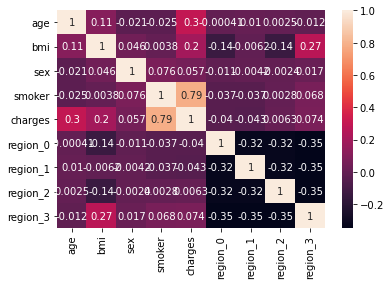

In [52]:
correlation_matrix = data.corr()
print('Correlation Matrix:\n', correlation_matrix)
fig = plt.figure
ax = sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### 8.Calculate the weights with the OLS equation
### 𝒘 = (𝑿𝑇𝑿)−1𝑿𝑇𝒚

In [53]:
class LinearRegression():
    def __init__(self,train,test):
        sample, feature = train.shape
        self.weights = np.ones((feature+1,1))
        
        self.trainx = X_train
        self.trainy = y_train
        self.train_prediction = []
        
        print(f'Training data X shape:{self.trainx.shape}')
        print(f'Training data Y shape:{self.trainy.shape}')
        
        self.testx = X_test
        self.testy = y_test
        self.test_prediction = []
        
    def train(self):
        number, _ = self.trainx.shape
        ones = np.ones((number,1))
        x_new = np.append(ones,self.trainx,axis=1) #x
        x_new_t = np.transpose(x_new) #x.t
        
        self.weights = np.dot(
            np.dot(np.linalg.inv(np.dot(x_new_t,x_new)),x_new_t),
            self.trainy
        )
        return self.weights
    
    def train_metric(self):
        n,_ = self.trainx.shape
        ones = np.ones((n,1))
        x_new = np.append(ones,self.trainx,axis=1) 
        predictions = np.dot(self.weights,x_new.T)
        residual_sum = np.sum(np.square(self.trainy - predictions))
        error = residual_sum/n
        print(f'Training MSE is {error}')
        plt.figure(figsize=(20,8))
        plt.plot(predictions,'o')
        plt.plot(self.trainy,'o')
        plt.show()
    
    def test_metric(self):
        n,_ = self.testx.shape
        ones = np.ones((n,1))
        x_new = np.append(ones,self.testx,axis=1) 
        predictions = np.dot(self.weights,x_new.T)
        residual_sum = np.sum(np.square(self.testy - predictions))
        error = residual_sum/n
        print(f'Testing MSE is {error}')
        plt.figure(figsize=(20,8))
        plt.plot(predictions,'o')
        plt.plot(self.testy,'o')
        plt.show()
    

  ### 9. Get the predictions and calculating the sum of squared errors

In [54]:
linear_model = LinearRegression(train,test)

Training data X shape:(1070, 8)
Training data Y shape:(1070,)


In [55]:
linear_model.train()

array([ 1.51310338,  0.30301858,  0.16381923, -0.00782301,  0.78793271,
       -1.44368976, -1.61884921, -1.29625778, -1.43476431])

Training MSE is 0.2620190632022149


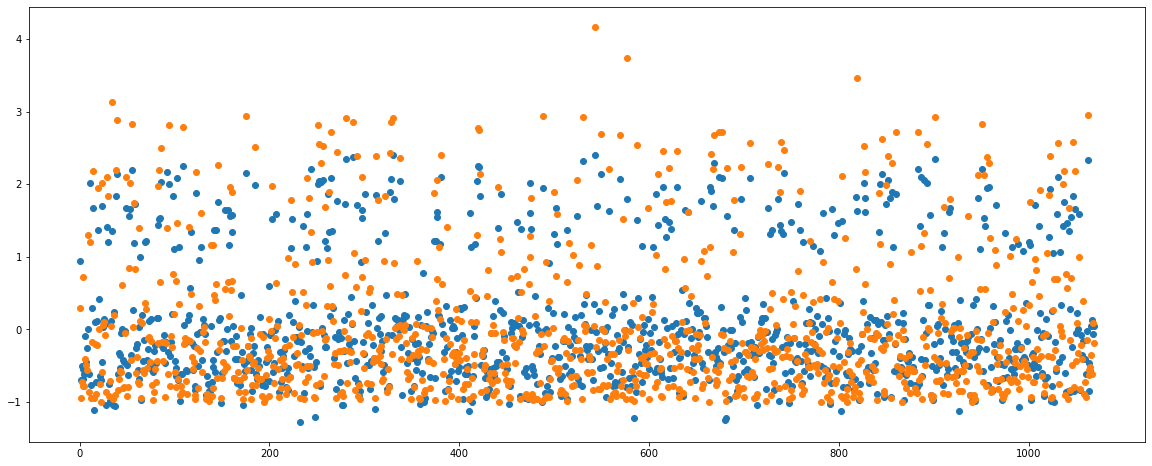

In [56]:
linear_model.train_metric()

Testing MSE is 0.26997364334126345


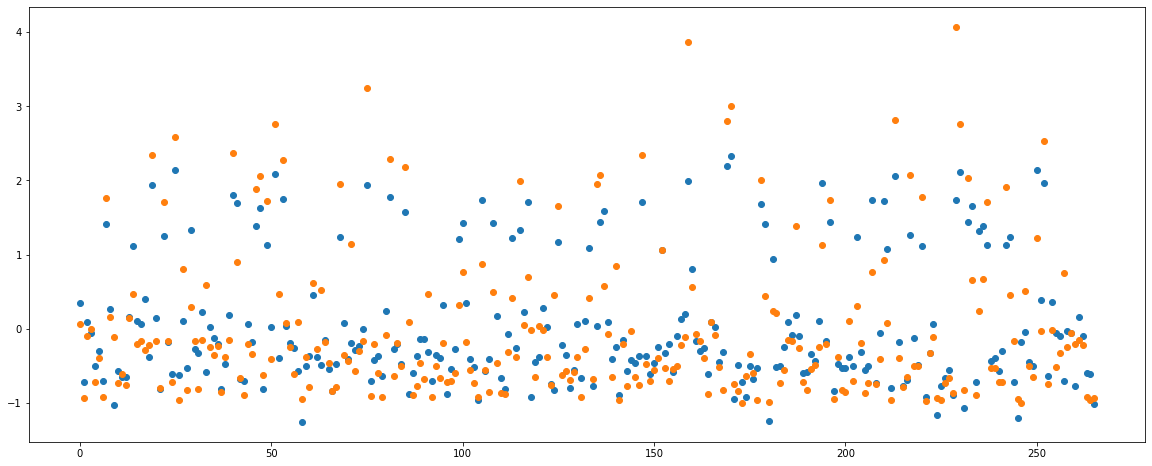

In [57]:
linear_model.test_metric()

In [62]:
linear_model.weights 

array([ 1.51310338,  0.30301858,  0.16381923, -0.00782301,  0.78793271,
       -1.44368976, -1.61884921, -1.29625778, -1.43476431])